In [81]:
import torch
import numpy as np

In [83]:
def f(x):
    temp = (x[0]-3)**2 + 2.4*(x[1]-5)**2 +10
    return temp

In [85]:
def grad_f(x):
    temp = torch.tensor([2*(x[0]-3), 4.8*(x[1]-5)])
    return temp

In [87]:
history = [] # learning curve 확인하고자
lr = 0.1

x = torch.tensor([7.0, 3.0])
print("x=",x, "    and corresponding f(x)=", f(x))
history.append(f(x))
for i in range(30):  # (3,5)에 가까워지는 것 확인 가능
    x -= lr * grad_f(x)
    print("x=",x, "    and corresponding f(x)=", f(x))
    history.append(f(x))

x= tensor([7., 3.])     and corresponding f(x)= tensor(35.6000)
x= tensor([6.2000, 3.9600])     and corresponding f(x)= tensor(22.8358)
x= tensor([5.5600, 4.4592])     and corresponding f(x)= tensor(17.2555)
x= tensor([5.0480, 4.7188])     and corresponding f(x)= tensor(14.3841)
x= tensor([4.6384, 4.8538])     and corresponding f(x)= tensor(12.7357)
x= tensor([4.3107, 4.9240])     and corresponding f(x)= tensor(11.7319)
x= tensor([4.0486, 4.9605])     and corresponding f(x)= tensor(11.1033)
x= tensor([3.8389, 4.9794])     and corresponding f(x)= tensor(10.7047)
x= tensor([3.6711, 4.9893])     and corresponding f(x)= tensor(10.4506)
x= tensor([3.5369, 4.9944])     and corresponding f(x)= tensor(10.2883)
x= tensor([3.4295, 4.9971])     and corresponding f(x)= tensor(10.1845)
x= tensor([3.3436, 4.9985])     and corresponding f(x)= tensor(10.1181)
x= tensor([3.2749, 4.9992])     and corresponding f(x)= tensor(10.0756)
x= tensor([3.2199, 4.9996])     and corresponding f(x)= tensor(10.0484)


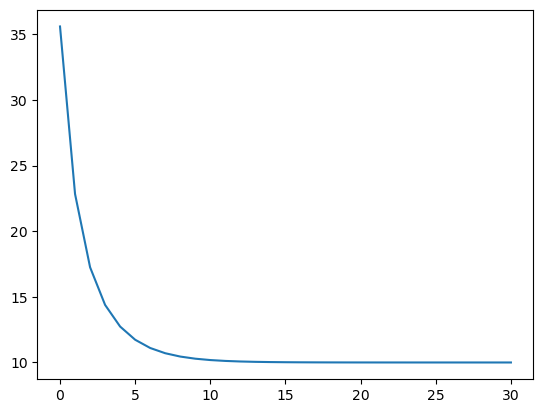

In [89]:
import matplotlib.pyplot as plt
plt.plot(history) # 더 훈련횟수 늘려 중간부터 확인해보면 수렴하는 것 확인 가능

* Caution 1: you cannot calculate ```y.backward()``` again.
* Caution 2: If you calculate ```y=2*x**3 _x``` and calculate ```y.backward()``` again, then derivatives are accumumated.

In [92]:
x = torch.tensor(1.0, requires_grad=True)
y = 2 * x**3 + x
y.backward()
x.grad

tensor(7.)

In [94]:
y = 2 * x**3 + x
y.backward()
x.grad # 7+7 # derivative is doubled => x를 다시 선언해주면 돼

tensor(14.)

* How to avoid the accumulation of derivatives? => Use `x.grad=None`.

In [97]:
x = torch.tensor(1.0, requires_grad=True)
y = 2 * x**3 + x
y.backward()
print(x.grad)
y = 2 * x**3 + x

# grad를 다시 초기화해주면 backward 다시 실행할 수 있어!
x.grad=None
y.backward()
print(x.grad)

tensor(7.)
tensor(7.)


* Ex) Calculate $\frac{d}{d x} \cos(x)$ at $x=\pi/3$.

In [100]:
x = torch.tensor([torch.pi/3], requires_grad=True)
y = torch.cos(x)
y.backward()
x.grad

tensor([-0.8660])

* `requires_grads=True`인 tensor는 tensor를 바로 .numpy() 로 변환 불가능  
* `.detach().numpy()` 로 변환 가능

In [103]:
a = torch.tensor([1.0,2.0,3.0,12.0])
b = a.numpy()
print(a)
print(b)
b

tensor([ 1.,  2.,  3., 12.])
[ 1.  2.  3. 12.]


array([ 1.,  2.,  3., 12.], dtype=float32)

In [105]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# np.sum(x) # error
np.sum(x.detach().numpy())

6.0

* Ex)
$y=\exp(2x_1)+x_2^2$.

Calculate $\triangledown y = \left( \frac{\delta y}{\delta x_1},
\frac{\delta y}{\delta x_2} \right)$ at $x_1=1.0$ and $x_2=2.0$.

In [112]:
x = torch.tensor([1.0, 2.0], requires_grad=True)
y = torch.exp(2*x[0]) + x[1]**2
y.backward()
x.grad

tensor([14.7781,  4.0000])

# Gradient Descent with Pytorch

You want to minimize the following function using gradient descent algorithm.

$f(x_1, x_2)=(x_1-3)^2 +2.4(x_2-5)^2 +10$.

Your algorithm for the gradneitn descent algorithm is as follows with learning rate lr$=0.1$.

1. Let's start with $x^{[0]}=(x_1^{[0]}, x_2^{[0]})=(7.0, 3.0)$.

2. Update  $x^{[1]} = x^{[0]} - {\rm lr} \cdot \triangledown f(x^{[0]})$

3. Keep updating until converge

In [338]:
lr = 0.1
x = torch.tensor([7.0, 3.0], requires_grad=True)
y = (x[0]-3)**2+2.4*(x[1]-5)**2+10
y.backward()
print(x.data)
x.data = x.data - lr * x.grad
x.data

tensor([7., 3.])


tensor([6.2000, 3.9600])

In [340]:
# 계속 반복
y = (x[0]-3)**2+2.4*(x[1]-5)**2+10
x.grad = None
y.backward()
x.data = x.data - lr * x.grad
x.data

tensor([5.5600, 4.4592])

In [342]:
x = torch.tensor([7.0, 3.0], requires_grad=True)
y = (x[0]-3)**2+2.4*(x[1]-5)**2+10

In [344]:
epochs=30
history = []
lr = 0.1

for epoch in range(epochs):
  x.grad=None
  y = (x[0]-3)**2+2.4*(x[1]-5)**2+10 # loss ftn 계산
  y.backward() # backward 하기 전에 grad 비워줘야해!
  x.data = x.data - lr * x.grad # 수렴하기
  history.append(y.item()) # y를 numpy로 바꿔주어야 plot 가능해

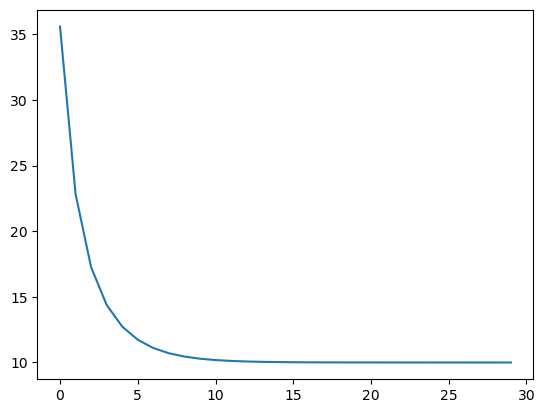

In [346]:
plt.plot(history)

In [348]:
x.data

tensor([3.0050, 5.0000])

* Ex) You want to derive the solution of the following equation

$0=x^2+2x+1$

using optimization. Answer the following questions.

1. Write the proper loss function.
2. Use gradient descent algorighm to find the solution of the optimization problem

In [351]:
# loss = ((x**2 + 2*x) - (-1))**2 = (x**2 + 2*x + 1)**2

In [353]:
lr = 0.01
epoch = 100
history = []

x = torch.tensor([3.0], requires_grad=True)
for i in range(epoch):
    y = (x**2 + 2*x + 1)**2  # loss ftn 계산
    x.grad = None # grad 비워주고
    y.backward() # derivative 계산
    x.data = x.data - lr * x.grad  # gradient descent
    history.append(y.item())

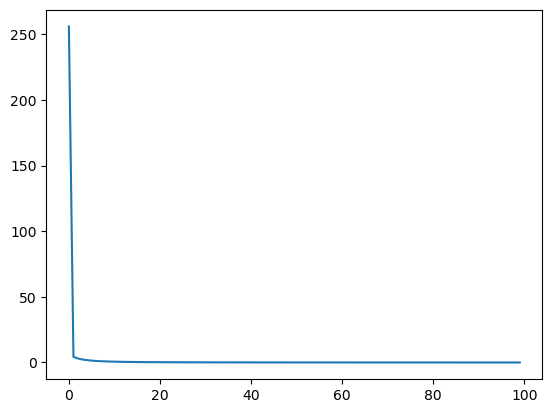

In [355]:
plt.plot(history)

# Stochastic Gradient Descent
* Simple linear regression with "full batch" gradient descent.

You are given $X$ and $Y$. Using the linear regression, you want to have the following model

$\widehat{Y}=\widehat{\beta}_0+\widehat{\beta}_1X$

by minimizing the following square loss

$$L_n(\beta)=\frac{1}{n}\sum\limits_{i=1}^{n}(y_i-\widehat{y}_i)^2$$

where $\widehat{y}_i = \beta_0+\beta_1 x_i$ and $n=20$.


Follow the following steps to do linear regression.

1. Reshape $X$ into the shape of $[20,2]$ and name it as $XX$.

2. Using, `torch.tensor`, define $\beta:=(\beta_0, \beta_1)$ ready to calculate derivatives.

3. Define $\widehat{Y}$ of size $[20,1]$ using $XX$ and $\beta$.

4. Then, using gradient descent, find $\widehat{\beta}$ which minimizes $L_n(\beta)$.

5. Track the learning process.




In [359]:
X=torch.tensor([-3.0000e+00, -2.7000e+00, -2.4000e+00, -2.1000e+00, -1.8000e+00,
        -1.5000e+00, -1.2000e+00, -9.0000e-01, -6.0000e-01, -3.0000e-01,
        -2.3842e-08,  3.0000e-01,  6.0000e-01,  9.0000e-01,  1.2000e+00,
         1.5000e+00,  1.8000e+00,  2.1000e+00,  2.4000e+00,  2.7000e+00])

In [361]:
Y = torch.tensor([-7.1452, -5.4253, -5.1977, -3.6225, -3.8022, -4.4101, -4.6622, -3.1932,
        -1.7325, -1.8879, -1.0742, -0.2320,  1.8226,  1.5453, -1.5535,  0.8857,
         1.7537,  3.1607,  1.8912,  4.0895])

In [363]:
# 1
print(X.shape)
ones = torch.ones([20])
XX = torch.stack([ones, X ], axis=1) # 차원 늘리기 -> torch.stack
XX.shape

torch.Size([20])


torch.Size([20, 2])

In [365]:
# 2
beta = torch.tensor([[5],
                     [1.0]], requires_grad=True)

In [367]:
# 3
Yhat = XX @ beta # [20,2] @ [2,1]
Y = Y.reshape([-1,1])
Loss = torch.mean((Y - Yhat) **2)  # Y : [20,], Yhat : [20,1] -> Y가 broadcasting되어 (1,20)이 될 것임.
Loss.backward()
beta.data = beta.data - lr * beta.grad

In [369]:
# 반복문에 넣기 (여기서부터 최종)
X=torch.tensor([-3.0000e+00, -2.7000e+00, -2.4000e+00, -2.1000e+00, -1.8000e+00,
        -1.5000e+00, -1.2000e+00, -9.0000e-01, -6.0000e-01, -3.0000e-01,
        -2.3842e-08,  3.0000e-01,  6.0000e-01,  9.0000e-01,  1.2000e+00,
         1.5000e+00,  1.8000e+00,  2.1000e+00,  2.4000e+00,  2.7000e+00])

In [371]:
Y = torch.tensor([-7.1452, -5.4253, -5.1977, -3.6225, -3.8022, -4.4101, -4.6622, -3.1932,
        -1.7325, -1.8879, -1.0742, -0.2320,  1.8226,  1.5453, -1.5535,  0.8857,
         1.7537,  3.1607,  1.8912,  4.0895]).reshape([-1,1])

In [373]:
ones = torch.ones([20])
XX = torch.stack([ones, X], axis=1) # [20,2]

In [375]:
lr = 0.1
epochs = 30
history = []
beta = torch.tensor([[5],
                     [1.0]], requires_grad=True) # [2,1]

for epoch in range(epochs):
    Yhat = XX @ beta # [20,1]
    Loss = torch.mean((Y - Yhat) **2) # Y도 [20,1]로 맞춰주기
    history.append(Loss.item()) # 어디든 들어가도 
    beta.grad=None # backward 전에 넣어줘야해!! 아주 중요
    Loss.backward()
    beta.data = beta.data - lr * beta.grad # 1번의 epoch에서 data 20개로 30번의 gradient descent가 일어난다

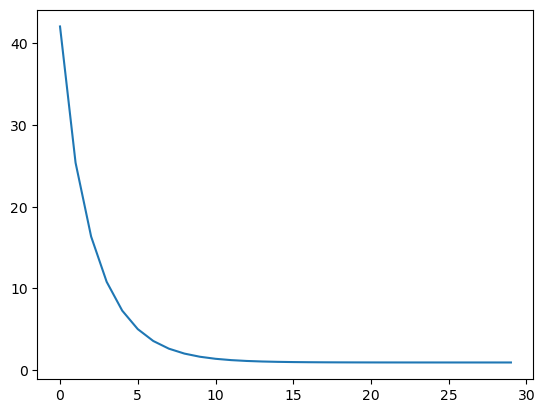

In [377]:
plt.plot(history)

In [379]:
beta.data

tensor([[-1.1741],
        [ 1.7155]])

* Simple linear regression with "minibatch" gradient descent.

In [382]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

dataset = TensorDataset(XX,Y)
trainloader=DataLoader(dataset = dataset, batch_size=5, shuffle=True)

In [390]:
lr = 0.1
epochs = 30
history = []
beta = torch.tensor([[5],
                     [1.0]], requires_grad=True) # [2,1]

for epoch in range(epochs):
    for xx, yy in trainloader:
        yhat = xx @ beta # [5,1] # batch_size인 5개씩 한 묶음
        loss = torch.mean((yy - yhat) **2) 
        history.append(loss.item()) 
        beta.grad=None # backward 전에 넣어줘야해!! 아주 중요
        loss.backward()
        beta.data = beta.data - lr * beta.grad
    Yhat = XX @ beta
    LOSS = torch.mean((Y - Yhat)**2) # 20개 데이터로 구한 LOSS
    history.append(LOSS.item()) 

# 1 epoch에서 5개의 데이터로 4번의 gradient descent가 일어난다
# 30 epoch => 4*30 = 120번

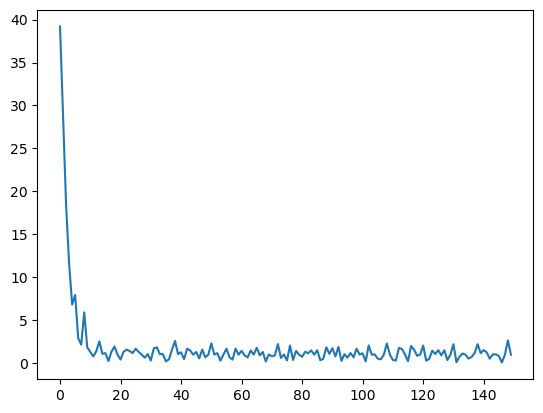

In [392]:
plt.plot(history)

In [394]:
beta.data

tensor([[-1.2011],
        [ 1.7412]])